# Natural Language Processing

In [5]:
import numpy as no
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv("yelp.csv")

In [7]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [9]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [10]:
# Create a new columns of text length
df["text length"] = df["text"].apply(len)

In [11]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# EDA

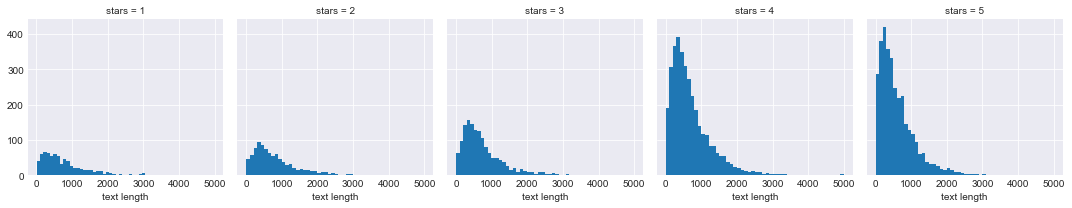

In [12]:
sns.set_style("darkgrid")
g = sns.FacetGrid(df, col="stars")
g = g.map(plt.hist, "text length", bins=50)

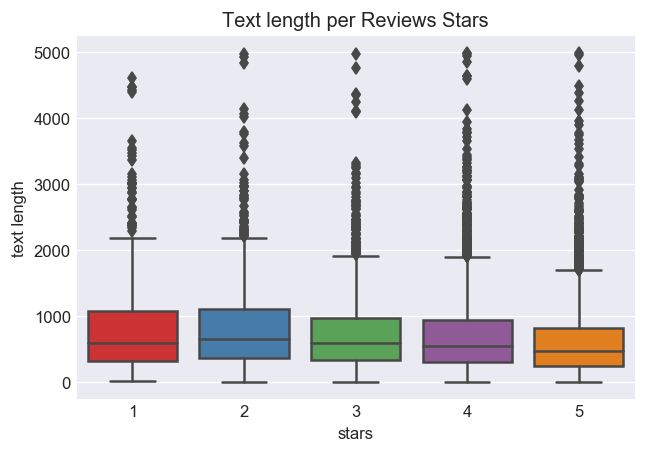

In [13]:
plt.figure(dpi=120)
sns.boxplot(x="stars", y="text length", data=df, palette="Set1")
plt.title("Text length per Reviews Stars")
plt.show()

### The length might not be a usefull feature... (Check how many outliers outside the box...)

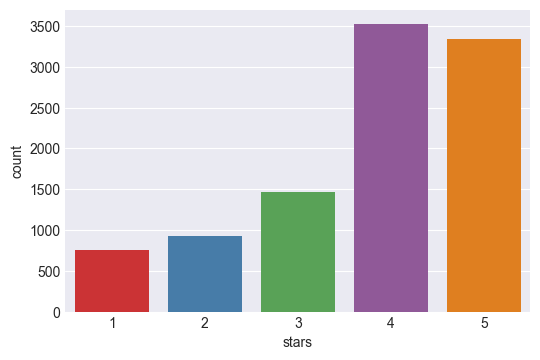

In [14]:
plt.figure(dpi=100)
sns.countplot(df["stars"], palette="Set1")
plt.show()

In [15]:
# Let's see the numerical values means grouped by Stars Rating 
groupByStars = df.groupby(by="stars").mean()
groupByStars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


### Let's scale groupByStars to see if there is some correlations

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
scaler.fit(groupByStars)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
scaled_data = scaler.transform(groupByStars)

In [19]:
groupByStars.columns

Index(['cool', 'useful', 'funny', 'text length'], dtype='object')

In [20]:
scaledGroupByStars = pd.DataFrame(data=scaled_data, index=groupByStars.index, columns=groupByStars.columns)

In [21]:
scaledGroupByStars

,cool,useful,funny,text length
stars,,,,
1,-1.546864,1.354960,1.678926,0.927314
2,-0.542965,0.988917,0.578831,1.125978
3,-0.057910,-1.262384,-0.527880,0.068905
4,1.110302,-0.478703,-0.676172,-0.506276
5,1.037437,-0.602790,-1.053705,-1.615921


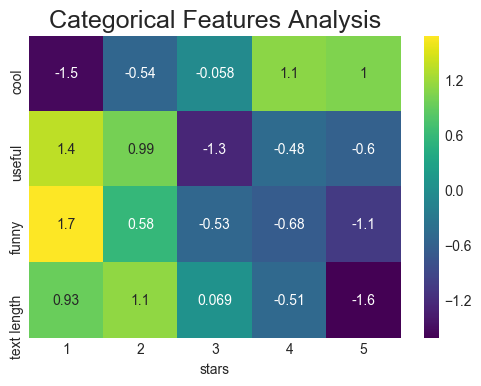

In [22]:
plt.figure(dpi=100)
sns.heatmap(scaledGroupByStars.T, cmap="viridis", annot=True)
plt.title("Categorical Features Analysis", fontsize=18)

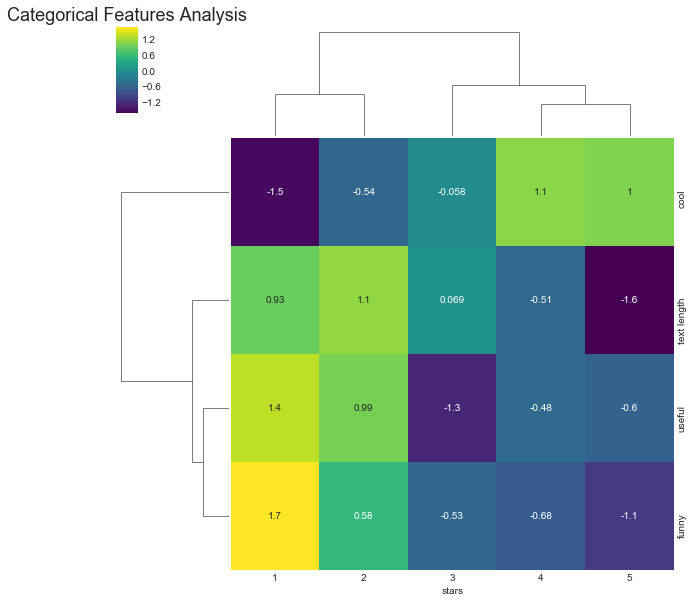

In [23]:
plt.figure(dpi=100)
sns.clustermap(scaledGroupByStars.T, cmap="viridis", annot=True)
plt.title("Categorical Features Analysis", fontsize=18)

### Look like the Categorical Features Analysis could be usefull

In [24]:
# Let's see if there is correlation between those numericals variables
groupByStars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


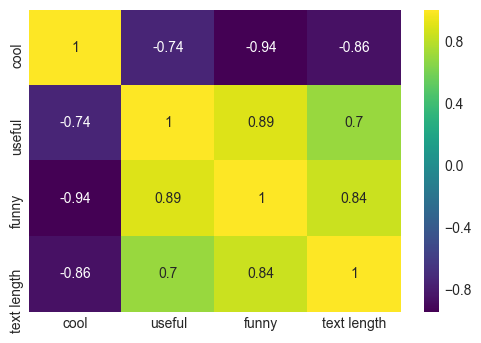

In [25]:
plt.figure(dpi=100)
sns.heatmap(groupByStars.corr(), cmap="viridis", annot=True)
plt.show()

# NLP Classification Time (With 5 and 1 stars review to start)

In [26]:
# Let's make a df including only the 5 and 1 stars reviews
yelp_class = df[(df["stars"] == 1) | (df["stars"] == 5)]

In [27]:
yelp_class["stars"].value_counts()

5    3337
1     749
Name: stars, dtype: int64

In [28]:
X = yelp_class["text"]
y = yelp_class["stars"]

In [29]:
# # We haven't use this because we've got really lower result...

# import string
# from nltk.corpus import stopwords

# # Lets clean our text datas
# def textCleaner(review):
#     """
#     1. Get punctuation away
#     2. Get stopwords away
#     3. Return the cleaned review
#     """
    
#     noPunct = "".join([char for char in review if char not in string.punctuation])
    
#     return [word for word in noPunct.split() if word.lower() not in stopwords.words("english")]

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer().fit(X)

In [31]:
# messages_bow = bow_transformer.transform(messages['message'])

X = cv.transform(X)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Starting with MultinomialNB

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
review_model = MultinomialNB()
review_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
predictions = review_model.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Let's Create a Pipeline

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer

In [40]:
from sklearn.pipeline import Pipeline

In [41]:
pipeline = Pipeline([
    ("bagOfWords", CountVectorizer()),
#     ("tfidf", TfidfTransformer()),         # We've got lower result with this one on
    ("classifier", MultinomialNB())
])

In [42]:
X = yelp_class["text"]
y = yelp_class["stars"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bagOfWords', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [44]:
predictions = pipeline.predict(X_test)

In [45]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(print(classification_report(y_test, predictions)))

[[155  73]
 [ 15 983]]


             precision    recall  f1-score   support

          1       0.91      0.68      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.93      0.93      0.92      1226

None


# Let's test if with SGDClassifier

In [46]:
from sklearn.linear_model import SGDClassifier

In [47]:
pipeline = Pipeline([
    ("bagOfWords", CountVectorizer()),
    ("classifier", SGDClassifier())
])

In [48]:
X = yelp_class["text"]
y = yelp_class["stars"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
pipeline.fit(X_train, y_train)

/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('bagOfWords', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
       ...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [50]:
predictions = pipeline.predict(X_test)

In [51]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(print(classification_report(y_test, predictions)))

[[181  47]
 [ 34 964]]


             precision    recall  f1-score   support

          1       0.84      0.79      0.82       228
          5       0.95      0.97      0.96       998

avg / total       0.93      0.93      0.93      1226

None


# Let's Try another classifier => Neural Network => MLPClassifier

In [52]:
from sklearn.neural_network import MLPClassifier

In [53]:
pipeline = Pipeline([
    ("bagOfWords", CountVectorizer()),
    ("classifier", MLPClassifier())
])

In [54]:
X = yelp_class["text"]
y = yelp_class["stars"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [55]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bagOfWords', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
       ...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])

In [56]:
predictions = pipeline.predict(X_test)

In [57]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(print(classification_report(y_test, predictions)))

[[185  43]
 [ 20 978]]


             precision    recall  f1-score   support

          1       0.90      0.81      0.85       228
          5       0.96      0.98      0.97       998

avg / total       0.95      0.95      0.95      1226

None


# Test it on all the reviews

# Starting with MultinomialNB

In [58]:
X = df["text"]
y = df["stars"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [59]:
pipeline = Pipeline([
    ("bagOfWords", CountVectorizer()),
    ("classifier", MultinomialNB())
])

In [60]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bagOfWords', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [61]:
predictions = pipeline.predict(X_test)

In [62]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(print(classification_report(y_test, predictions)))

[[ 70  31  13  71  35]
 [ 16  22  39 165  31]
 [  5  10  41 345  42]
 [  7   3  25 766 263]
 [  6   3   6 438 547]]


             precision    recall  f1-score   support

          1       0.67      0.32      0.43       220
          2       0.32      0.08      0.13       273
          3       0.33      0.09      0.14       443
          4       0.43      0.72      0.54      1064
          5       0.60      0.55      0.57      1000

avg / total       0.48      0.48      0.45      3000

None


# With SGDClassifier

In [63]:
pipeline = Pipeline([
    ("bagOfWords", CountVectorizer()),
    ("classifier", SGDClassifier())
])

In [64]:
X = df["text"]
y = df["stars"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [65]:
pipeline.fit(X_train, y_train)

/Users/Rioux/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('bagOfWords', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
       ...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [66]:
predictions = pipeline.predict(X_test)

In [67]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(print(classification_report(y_test, predictions)))

[[103  32   6  59  20]
 [ 39  71  17 127  19]
 [ 17  45  51 291  39]
 [ 15  27  40 737 245]
 [ 10  15  20 450 505]]


             precision    recall  f1-score   support

          1       0.56      0.47      0.51       220
          2       0.37      0.26      0.31       273
          3       0.38      0.12      0.18       443
          4       0.44      0.69      0.54      1064
          5       0.61      0.51      0.55      1000

avg / total       0.49      0.49      0.47      3000

None


# With neural network (MPL)

In [68]:
pipeline = Pipeline([
    ("bagOfWords", CountVectorizer()),
    ("classifier", MLPClassifier())
])

In [69]:
X = df["text"]
y = df["stars"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [70]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bagOfWords', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
       ...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])

In [71]:
predictions = pipeline.predict(X_test)

In [72]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(print(classification_report(y_test, predictions)))

[[ 86  65  21  21  27]
 [ 38  74  91  45  25]
 [ 19  50 159 153  62]
 [  7  26 130 550 351]
 [ 15  17  35 353 580]]


             precision    recall  f1-score   support

          1       0.52      0.39      0.45       220
          2       0.32      0.27      0.29       273
          3       0.36      0.36      0.36       443
          4       0.49      0.52      0.50      1064
          5       0.56      0.58      0.57      1000

avg / total       0.48      0.48      0.48      3000

None


# At the end of the day, the SGDClassifier look to perform a little better on all the dataset but it's still only have an accuracy of less than 50%...